## AEROPOLIS
#### Group 296881

In [ ]:
"""
SMALL SUMMARY --- --- --- REMOVE BEFORE SUBMISSION --- --- ---



One single notebook called “main.ipynb” with ALL the code used for the project.



The notebook must have the following characteristics:

    1. Text and code cells must alternate from start to finish. The text cell above must
       describe the contents of the code below and its output so that a reader can easily
       follow up on your implementation. 

    2. You must explain what you will do and why you chose to do so.

    3. You must explain the outputs of the cell (if any) with particular attention
       to describing figures such that a reader already knows what he is going to see.
"""

In [ ]:
"""
ALL TASKS --- --- --- REMOVE BEFORE SUBMISSION --- ---- ----

Data Preprocessing:
    Load and inspect the dataset.
    Handle missing values (e.g., impute or drop).
    Encode categorical features (e.g., one-hot encoding).

Model Selection and Training:
    Choose a machine learning algorithm (maybe Random Forest Regressor).
    Split the data into training and testing sets (80%/20% split).
    Train the model on the training set.

Model Evaluation:
    Evaluate the model using metrics such as Mean Absolute Error (MAE) and R-squared.
    Compare with baseline models (e.g., Linear Regression, Decision Trees).

Model Improvement:
    Perform hyperparameter tuning (e.g., using GridSearchCV).
    Optionally, explore other models like Gradient Boosting.

Feature Importance:
    Visualize feature importance from the Random Forest model.

Reporting:
    Write the project report, including:
        Introduction: Brief project overview.
        Methods: Approach, algorithm, features, and environment setup.
        Experimental Design: Baselines, metrics, and purpose of experiments.
        Results: Evaluation metrics, findings, and visualizations.
        Conclusions: Takeaways, unanswered questions, and next steps.

Code and Documentation:
    Provide clean, well-documented code.
    Include instructions for setting up the environment (e.g., requirements.txt or conda environment).
"""

## [SECTION 1] Introduction and EDA

To be added. Brief overview and aim. Lorem ipsum.

### Data Preparation

We sample our dataset for ease of calculation (especially in the early stages).
The earliest sample was 1.000 with frac = 0.001, then 10.000 with frac = 0.01.

In [ ]:
# Get the filepath from user and read the data
fileInput = None
if not fileInput:
    print("Please enter the path to the file: ")
    fileInput = input()

Please enter the path to the file: 


In [ ]:
import pandas as pd

df_or = pd.read_csv(f"{fileInput}/aeropolis.csv")

# Sample a smaller version of the dataset
df_sm = df_or.sample(frac=0.01, random_state=1) 
"""
Started with 10.000 entries instead of the original 1.000.000
"""

# Save the above (smaller) dataset
df_sm.to_csv('aeropolis_sample.csv', index=False)

### Data Explanation

Add info about shape, num of entries etc. Lorem ipsum.

In [18]:
# Data Structure

df = df_or 
# Easily switch between the original dataset and saple (df_sm) as needed

print("--- First Few Entries of the Dataset ---")
df.head()

--- First Few Entries of the Dataset ---


,Cargo_Capacity_kg,Air_Temperature_Celsius,Weather_Status,Package_Type,Vertical_Landing,Equipment_Cost,Market_Region,Flight_Duration_Minutes,Terrain_Type,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Climate_Zone,Quantum_Battery,Flight_Zone,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
0,4.270384,32.241410,Cloudy,Maize,Supported,36563.84,Local,False,NaN,5831.79,164.0,112.0,86.49,Arid,False,East,0.39,412.0,756.205234,651.62
1,5.120852,24.635445,Sunny,Cotton,Supported,29156.29,Local,False,Sandy,NaN,160.0,NaN,15.13,Arid,True,East,0.90,207.0,618.345249,1102.33
2,2.976017,16.292566,Cloudy,Barley,Unknown,10909.55,International,False,Sandy,4797.87,127.0,93.0,25.76,Temperate,False,North,0.54,NaN,548.243396,975.97
3,4.990381,NaN,Sunny,Soybean,NaN,48315.38,International,True,Clay,7764.89,160.0,80.0,165.06,Polar,True,West,0.10,354.0,447.768700,924.49
4,2.938318,21.689674,NaN,Soybean,Unknown,49506.24,Local,False,Clay,4979.04,136.0,93.0,55.70,Temperate,False,North,0.73,346.0,342.361072,909.98


What we notice first here is that the *Flight_Duration_Minutes* values are not integer of float values, but booleans. This gives us no information on the fkight duration so from this point onwards we will ignore this data.

In [19]:
# Dataset Statistics

dtypes_count = df.dtypes.value_counts()

# Dataset Statistics
print(f"{'Dataset Statistics':^34}")
print(f"{'-'*34}")
print(f"{'Number of Rows':<25}: {df.shape[0]}")
print(f"{'Number of Columns':<25}: {df.shape[1]}")

# Printing dtype counts
for dtype, count in dtypes_count.items():
    print(f"Number of Dtype {str(dtype):<9}: {count}")

print("\n\n--- Descriptive Statistics ---")
describe_df = df.describe().round(3)
describe_df

        Dataset Statistics        
----------------------------------
Number of Rows           : 1000000
Number of Columns        : 20
Number of Dtype float64  : 11
Number of Dtype object   : 9


--- Descriptive Statistics ---


,Cargo_Capacity_kg,Air_Temperature_Celsius,Equipment_Cost,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
count,899767.000,900236.000,900197.000,900344.000,900273.000,900036.000,899602.000,900189.000,899779.000,900212.000,899614.000
mean,4.650,27.502,29987.481,4999.072,149.995,104.483,50.093,0.500,299.316,550.079,999.719
std,1.696,7.221,11548.037,1500.070,12.255,25.945,50.073,0.289,115.500,259.809,199.873
min,-1.148,15.000,10000.140,-2323.700,95.000,60.000,0.000,0.000,100.000,100.001,-133.070
25%,3.419,21.253,19972.210,3987.088,142.000,82.000,14.450,0.250,199.000,325.136,864.782
50%,4.652,27.505,29986.650,4997.685,150.000,104.000,34.730,0.500,299.000,550.349,999.750
75%,5.879,33.752,39990.970,6011.532,158.000,127.000,69.428,0.750,399.000,774.780,1134.480
max,9.963,40.000,49999.990,13104.200,213.000,149.000,716.380,1.000,499.000,999.998,1999.670


## EDA - Exploratory Data Analysis
### Missing Values and Data Integrity

We start by checking for missing values. Of all 1.000.000 entries around 100.000 of each category is missing. This is nearly 10% of all data.

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate missing and non-missing values
missing_values = df.isnull().sum()
non_missing_values = df.notnull().sum()
missing_percentage = ((missing_values / len(df)) * 100).round(2)

df = df_or # Use original dataset (or switch to sample "df_sm" as needed)

dtypes = df.dtypes

missing_data = pd.DataFrame({
    'Non_Null_Values': non_missing_values,
    'Null_Values': missing_values,
    '%_Missing': missing_percentage,
    'Data_Type': dtypes.values
}).sort_values(by='Null_Values', ascending=False)

# Output
missing_data


# Let's use either this or the one before but not both...


,Non_Null_Values,Null_Values,%_Missing,Data_Type
Package_Type,899579,100421,10.04,object
Cleaning_Liquid_Usage_liters,899602,100398,10.04,float64
Route_Optimization_Per_Second,899614,100386,10.04,float64
Cargo_Capacity_kg,899767,100233,10.02,float64
Vertical_Max_Speed,899779,100221,10.02,float64
Climate_Zone,899823,100177,10.02,object
Weather_Status,899826,100174,10.02,object
Flight_Zone,899843,100157,10.02,object
Market_Region,899887,100113,10.01,object
Quantum_Battery,900007,99993,10.00,object


### Missing Values Visualized

Now we visualize the missing data using several methods to gain a better understanding and detect any unusual patterns.

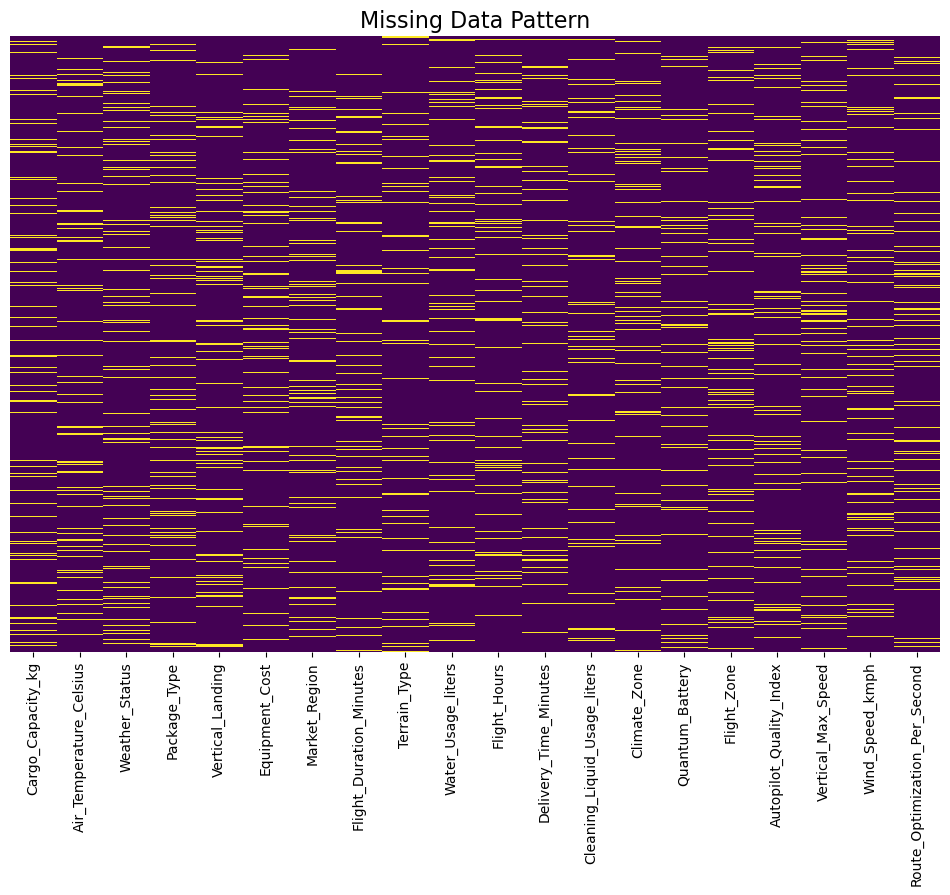

In [22]:
# Visualize missing data patterns
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern', fontsize=16)
plt.show()

Further Visaualization using missingno

<Axes: >

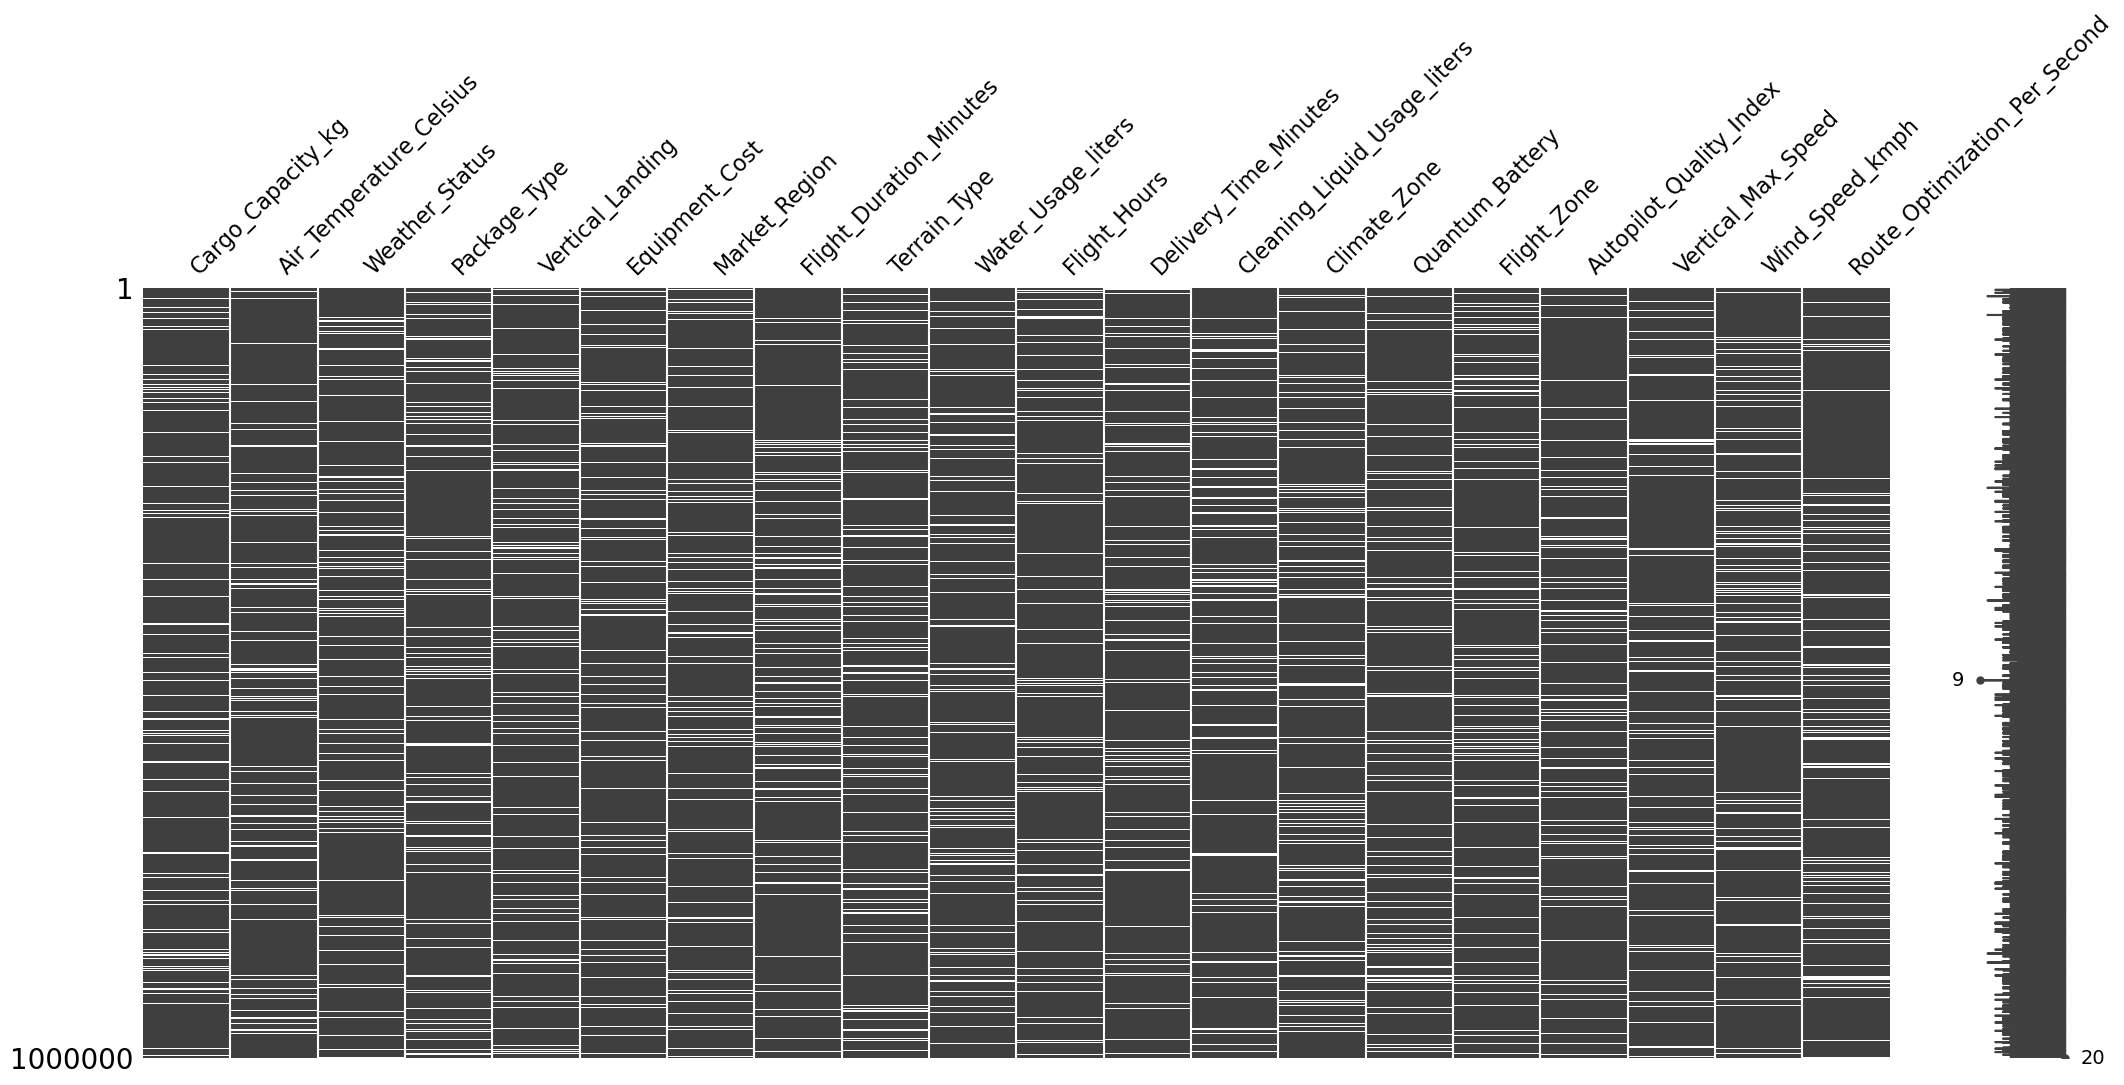

In [23]:
import missingno as msno

msno.matrix(df)

In [ ]:
"""
NEW TASKS --- --- --- REMOVE BEFORE SUBMISSION --- ---- ----

1. Analyze Missingness

Check for Patterns: Use visualizations (e.g., heatmaps, bar plots) to see if missing values in Cargo_Capacity_kg correlate with specific features (e.g., Weather_Status, Flight_Zone).
Types of Missingness:
MCAR: Data is missing randomly; removal or imputation is acceptable.
MAR: Data is missing due to other observed variables; more advanced imputation may be needed.
MNAR: Missingness depends on the missing variable itself; investigate reasons for missing data.
2. Use Advanced Imputation Methods

KNN Imputation: Replaces missing values with the nearest neighbors’ values. Works well for numerical and categorical data.
Multivariate Imputation (MICE): Uses regression models to predict missing values based on other features.
Model-Based Imputation: Train a predictive model (e.g., regression, decision trees) to fill in missing values.
3. Evaluate Impact of Missing Data

Run your analysis/model with and without the missing rows to understand how much they influence the results.
Use cross-validation to compare model performance with imputed vs. dropped data.
4. Document Your Decisions

Keep track of what method you used and why. Transparency ensures reproducibility and helps interpret results.
Usual Approach to Decide Between Dropping or Replacing
Quantify Missing Data:
If <5% of rows are missing, dropping them might be fine.
If >30%, imputation or deeper analysis is typically better.
Assess Feature Importance:
If Cargo_Capacity_kg is critical (e.g., target variable), invest more effort in imputing values meaningfully.
If the feature with missing data is not important, you might drop it altogether.
Consider Dataset Size:
In small datasets, imputation is generally better than dropping rows to avoid losing too much data.
Application to Aeropolis Dataset
Given the context of autonomous drones and the importance of optimizing cargo capacity:

Step 1: Analyze correlations between Cargo_Capacity_kg and key features such as Weather_Status, Flight_Duration_Minutes, Terrain_Type, and Market_Region to check if missingness is random.
Step 2: For numerical features, try advanced imputation methods (e.g., KNN or MICE). For categorical ones, explore mode or probability-based imputation.
Step 3: Use machine learning to predict missing Cargo_Capacity_kg values based on other features if correlations are strong.
This structured approach will help you better handle missing data and ensure the reliability of your insights and models.
"""

### Comments on Missing Values and Relationships Between Features

For all of the features, even with p-values well above common significance thresholds (0.05, 0.01, 0.001), based on the tests we've run, there's no statistical evidence to suggest that these features are correlated with missing values in Cargo_Capacity_kg. Choosing a lower threshold (e.g., 0.0001) would be counterproductive since it would only reduce the number of features you consider significant. Choosing a higher threshold for p is intuitively unnecessary as we would be willing to accept a very high flase-positive rate.

Values in Cargo_Capacity_kg appear to be *"missing at random"* with respect to the other variables. This suggests that the missingness is not influenced by specific factors in the dataset, and thus imputation or other techniques can be used without introducing significant bias.

In [ ]:
p_val = 0.05 # can be altered to see that the outputs do not change

categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['float', 'int']).columns

In [ ]:
from scipy.stats import chi2_contingency

missing_cargo = df['Cargo_Capacity_kg'].isnull()
contingency_table = pd.crosstab(df[col], missing_cargo)

print(f"{'P-Value Statistics after Chi-Squared Tests':^99}")
print(f"{'-'*99}")
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Cargo_Capacity_kg'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col} - p-value: {p:.4f}")
    if p < p_val:
        print(f"Missingness in Cargo_Capacity_kg is related to {col}.\n")
    else:
        print(f"No significant relationship between missingness in Cargo_Capacity_kg and {col}.\n")

                            P-Value Statistics after Chi-Squared Tests                             
---------------------------------------------------------------------------------------------------
Weather_Status - p-value: 0.7645
No significant relationship between missingness in Cargo_Capacity_kg and Weather_Status.

Package_Type - p-value: 0.5432
No significant relationship between missingness in Cargo_Capacity_kg and Package_Type.

Vertical_Landing - p-value: 0.2717
No significant relationship between missingness in Cargo_Capacity_kg and Vertical_Landing.

Market_Region - p-value: 0.7661
No significant relationship between missingness in Cargo_Capacity_kg and Market_Region.

Flight_Duration_Minutes - p-value: 0.2718
No significant relationship between missingness in Cargo_Capacity_kg and Flight_Duration_Minutes.

Terrain_Type - p-value: 0.1915
No significant relationship between missingness in Cargo_Capacity_kg and Terrain_Type.

Climate_Zone - p-value: 0.2848
No significant rela

When visualized, we see that the missing values follow the pattern of the available data.

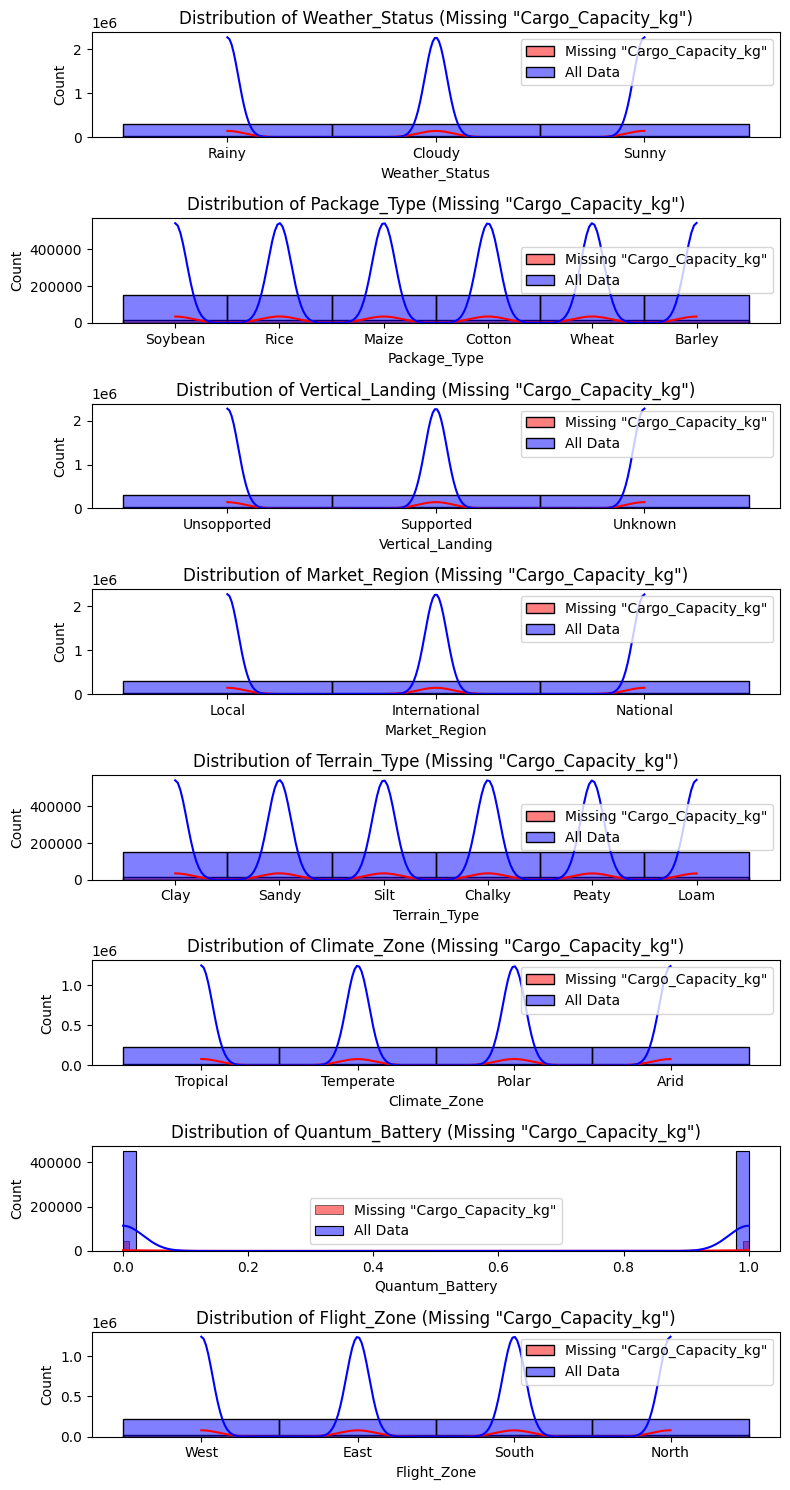

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_or

missing_values_rows = df[df['Cargo_Capacity_kg'].isnull()]

selected_columns = ['Weather_Status', 'Package_Type', 'Vertical_Landing', 'Market_Region', 
                    'Terrain_Type', 'Climate_Zone', 'Quantum_Battery', 'Flight_Zone']

fig, axes = plt.subplots(len(selected_columns), 1, figsize=(8, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_values_rows, x=col, ax=axes[i], kde=True, color='red', label='Missing "Cargo_Capacity_kg"', bins=111)
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='blue', label='All Data')
    axes[i].set_title(f'Distribution of {col} (Missing "Cargo_Capacity_kg")')
    axes[i].legend()
    #axes[i].set_yscale('log')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

missing_cargo = df[df['Cargo_Capacity_kg'].isnull()]
non_missing_cargo = df[~df['Cargo_Capacity_kg'].isnull()]

print(f"{'P-Value Statistics after T-Tests':^99}")
print(f"{'-'*105}")
for col in numerical_features:
    t_stat, p = ttest_ind(missing_cargo[col].dropna(), non_missing_cargo[col].dropna(), equal_var=False)
    print(f"{col} - p-value: {p:.4f}")
    if p < p_val:
        print(f"Missingness in Cargo_Capacity_kg is related to {col}.\n")
    else:
        print(f"No significant relationship between missingness in Cargo_Capacity_kg and {col}.\n")


                                 P-Value Statistics after T-Tests                                  
---------------------------------------------------------------------------------------------------------
Cargo_Capacity_kg - p-value: nan
No significant relationship between missingness in Cargo_Capacity_kg and Cargo_Capacity_kg.

Air_Temperature_Celsius - p-value: 0.1690
No significant relationship between missingness in Cargo_Capacity_kg and Air_Temperature_Celsius.

Equipment_Cost - p-value: 0.0317
Missingness in Cargo_Capacity_kg is related to Equipment_Cost.

Water_Usage_liters - p-value: 0.1512
No significant relationship between missingness in Cargo_Capacity_kg and Water_Usage_liters.

Flight_Hours - p-value: 0.6946
No significant relationship between missingness in Cargo_Capacity_kg and Flight_Hours.

Delivery_Time_Minutes - p-value: 0.6639
No significant relationship between missingness in Cargo_Capacity_kg and Delivery_Time_Minutes.

Cleaning_Liquid_Usage_liters - p-value: 0.1

When visualized, we see that the missing values follow the pattern of the available data.

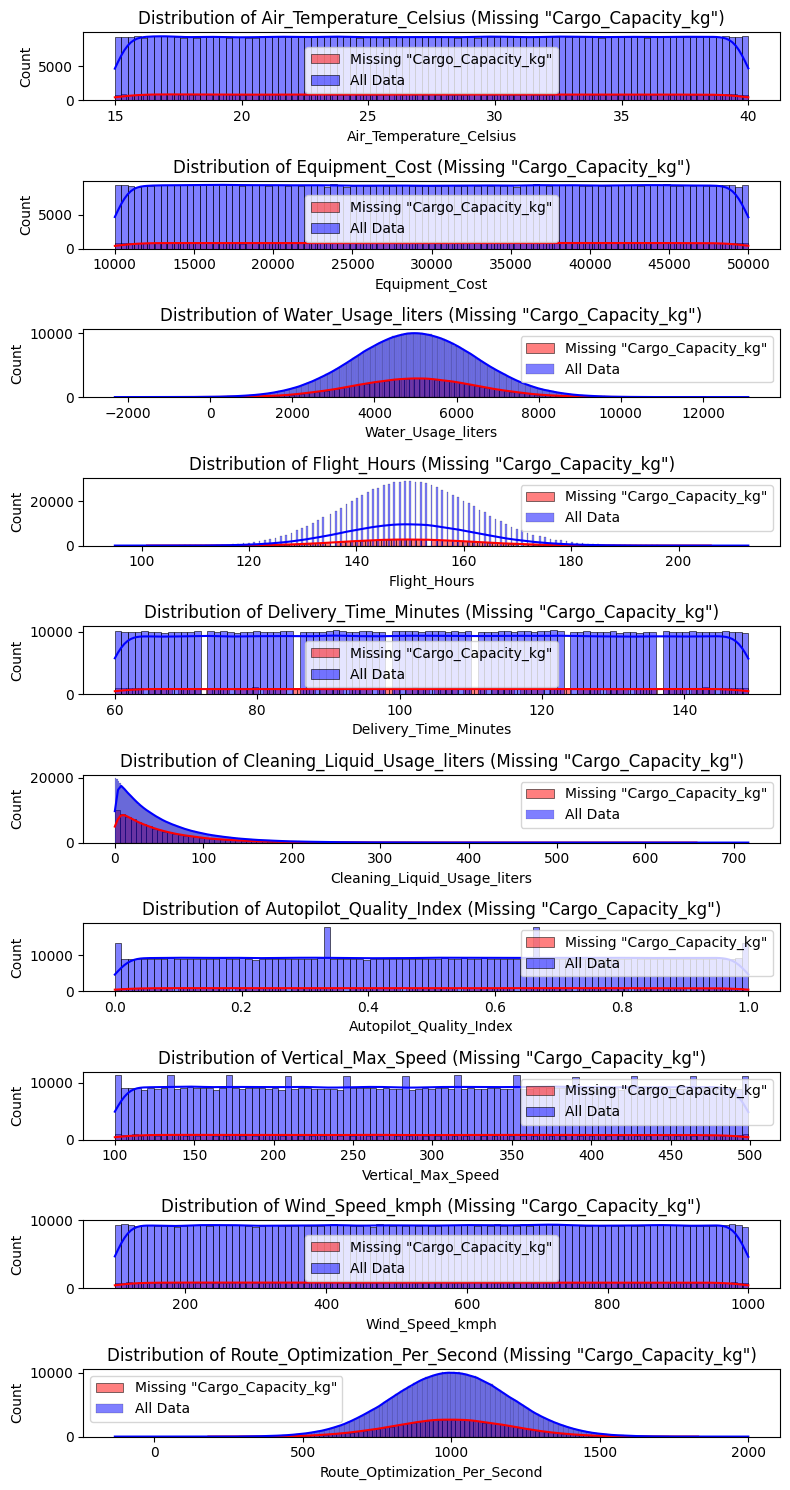

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_or

missing_values_rows = df[df['Cargo_Capacity_kg'].isnull()]

selected_columns = ['Air_Temperature_Celsius', 'Equipment_Cost', 'Water_Usage_liters', 'Flight_Hours', 
                    'Delivery_Time_Minutes', 'Cleaning_Liquid_Usage_liters', 'Autopilot_Quality_Index', 
                    'Vertical_Max_Speed', 'Wind_Speed_kmph', 'Route_Optimization_Per_Second']

fig, axes = plt.subplots(len(selected_columns), 1, figsize=(8, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_values_rows, x=col, ax=axes[i], kde=True, color='red', label='Missing "Cargo_Capacity_kg"', bins=111)
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='blue', label='All Data')
    axes[i].set_title(f'Distribution of {col} (Missing "Cargo_Capacity_kg")')
    axes[i].legend()
    #axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

### Little's MCAR Test
The null hypothesis is that missingness is not related to any other variables.

We use the *Chi-Squared Test.* We calculate the p-value for each feature’s missingness pattern with respect to the others. If the p-value is above 0.05, we do not reject the null hypothesis, and the missing data is consistent with MCAR.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


def little_mcar_test(df):
    # Step 1: Identify missingness
    missing_data = df.isnull()

    # Step 2: Initialize a dictionary to store p-values for each column
    p_values = {}

    # Step 3: Iterate over each column to test missingness
    for col in df.columns:
        if df[col].dtype != 'object':  # Skip non-categorical columns
            # Step 4: Create contingency table comparing missingness of this column to the others
            contingency_data = []

            # Check the missingness of this column against all other columns
            for other_col in df.columns:
                if col != other_col:
                    # Count missingness in the current column and the other column
                    contingency_data.append([missing_data[col].sum(), missing_data[other_col].sum()])
            
            # Create the contingency table
            contingency_table = pd.DataFrame(contingency_data, columns=['Missing', 'Not Missing'])

            # Step 5: Perform the Chi-Squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Step 6: Store the p-value for each column
            p_values[col] = p
    
    return p_values

# Run Little's MCAR test
p_values = little_mcar_test(df)

print(f"{'Little\'s MCAR Test':^77}")
print(f"{'-'*77}")
for col, p_value in p_values.items():
    print(f"{col} - p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Missingness in {col} is related to other variables (not MCAR).")
    else:
        print(f"Missingness in {col} is consistent with MCAR.\n")


                             Little's MCAR Test                              
-----------------------------------------------------------------------------
Cargo_Capacity_kg - p-value: 0.9937
Missingness in Cargo_Capacity_kg is consistent with MCAR.

Air_Temperature_Celsius - p-value: 0.9939
Missingness in Air_Temperature_Celsius is consistent with MCAR.

Equipment_Cost - p-value: 0.9933
Missingness in Equipment_Cost is consistent with MCAR.

Water_Usage_liters - p-value: 0.9956
Missingness in Water_Usage_liters is consistent with MCAR.

Flight_Hours - p-value: 0.9944
Missingness in Flight_Hours is consistent with MCAR.

Delivery_Time_Minutes - p-value: 0.9920
Missingness in Delivery_Time_Minutes is consistent with MCAR.

Cleaning_Liquid_Usage_liters - p-value: 0.9964
Missingness in Cleaning_Liquid_Usage_liters is consistent with MCAR.

Autopilot_Quality_Index - p-value: 0.9932
Missingness in Autopilot_Quality_Index is consistent with MCAR.

Vertical_Max_Speed - p-value: 0.9936
Missing

To be commented on later. This is the complete analysis for all columns in relation to each other.

In [ ]:
for target_col in df.columns:
    print(f"--- Analyzing Missingness for {target_col} ---")
    missing_target = df[df[target_col].isnull()]
    non_missing_target = df[df[target_col].notnull()]

    # Chi-Square for Categorical
    for col in categorical_features:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col].isnull())
            chi2, p, _, _ = chi2_contingency(contingency_table)
            print(f"{col} (Categorical) - p-value: {p:.4f}")
    
    # T-Test for Numerical
    for col in numerical_features:
        if col != target_col:
            t_stat, p = ttest_ind(
                missing_target[col].dropna(),
                non_missing_target[col].dropna(),
                equal_var=False
            )
            print(f"{col} (Numerical) - p-value: {p:.4f}")


--- Analyzing Missingness for Cargo_Capacity_kg ---
Weather_Status (Categorical) - p-value: 0.7645
Package_Type (Categorical) - p-value: 0.5432
Vertical_Landing (Categorical) - p-value: 0.2717
Market_Region (Categorical) - p-value: 0.7661
Flight_Duration_Minutes (Categorical) - p-value: 0.2718
Terrain_Type (Categorical) - p-value: 0.1915
Climate_Zone (Categorical) - p-value: 0.2848
Quantum_Battery (Categorical) - p-value: 0.5026
Flight_Zone (Categorical) - p-value: 0.3229
Air_Temperature_Celsius (Numerical) - p-value: 0.1690
Equipment_Cost (Numerical) - p-value: 0.0317
Water_Usage_liters (Numerical) - p-value: 0.1512
Flight_Hours (Numerical) - p-value: 0.6946
Delivery_Time_Minutes (Numerical) - p-value: 0.6639
Cleaning_Liquid_Usage_liters (Numerical) - p-value: 0.1839
Autopilot_Quality_Index (Numerical) - p-value: 0.6270
Vertical_Max_Speed (Numerical) - p-value: 0.3064
Wind_Speed_kmph (Numerical) - p-value: 0.9139
Route_Optimization_Per_Second (Numerical) - p-value: 0.9747
--- Analyzin

### Handling Missing Values

## [SECTION 2] Methods

Regression. Lorem Ipsum.

In [24]:
#code

## [SECTION 3] Experimental Design

Metrics. Lorem Ipsum.

In [25]:
#code

## [SECTION 4] Results

Lorem Ipsum.

In [26]:
#code

## [SECTION 5] Conclusions

In [27]:
#code